## Visualization of One Election 
#### It performs MDS on the data and outputs the candidates and voters positions on a single axis 


In [1]:
import seaborn as sns

from scipy.stats import kurtosis, skew

from rcv_distribution import *
from rcv_dimensionality import *
from voting_rules import *

##### Assign csv to the path of the file you are wishing to analyse

In [2]:
from itertools import permutations
c = [1,2,3,4]
perms = list(permutations(c))
c = [1,2,3]
perms += list(permutations(c))
c = [1,2,4]
perms += list(permutations(c))
c = [1,3,4]
perms += list(permutations(c))
c = [2,3,4]
perms += list(permutations(c))
c = [1,2]
perms += list(permutations(c))
c = [2,3]
perms += list(permutations(c))
c = [3,4]
perms += list(permutations(c))
c = [1,3]
perms += list(permutations(c))
c = [1,4]
perms += list(permutations(c))
c = [2,4]
perms += list(permutations(c))
c = [1]
perms += list(permutations(c))
c = [2]
perms += list(permutations(c))
c = [3]
perms += list(permutations(c))
c = [4]
perms += list(permutations(c))
consistent = []
nconsistent = []
for p in perms:
    ballot = []
    for i in p:
        ballot.append(i)
    if evaluate_ballot_consistency(ballot, 4)[0] is True:
        consistent.append(p)
    else:
        nconsistent.append(p)
print("consistent ballots: ")
for p in consistent:
    print(p)
print("non consistent ballots: ")
for p in nconsistent:
    print(p)

        


consistent ballots: 
(1, 2, 3, 4)
(2, 1, 3, 4)
(2, 3, 1, 4)
(3, 2, 4, 1)
(3, 4, 2, 1)
(4, 3, 2, 1)
(1, 2, 3)
(2, 1, 3)
(2, 3, 1)
(3, 2, 1)
(2, 3, 4)
(3, 2, 4)
(3, 4, 2)
(4, 3, 2)
(1, 2)
(2, 1)
(2, 3)
(3, 2)
(3, 4)
(4, 3)
(1,)
(2,)
(3,)
(4,)
non consistent ballots: 
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 4, 3)
(2, 3, 4, 1)
(2, 4, 1, 3)
(2, 4, 3, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 1, 4)
(3, 4, 1, 2)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 2, 3, 1)
(4, 3, 1, 2)
(1, 3, 2)
(3, 1, 2)
(1, 2, 4)
(1, 4, 2)
(2, 1, 4)
(2, 4, 1)
(4, 1, 2)
(4, 2, 1)
(1, 3, 4)
(1, 4, 3)
(3, 1, 4)
(3, 4, 1)
(4, 1, 3)
(4, 3, 1)
(2, 4, 3)
(4, 2, 3)
(1, 3)
(3, 1)
(1, 4)
(4, 1)
(2, 4)
(4, 2)


c:\Users\mahsh\Documents\GitHub\bugs-in-democracy\EIL summer 2023\rcv_dimensionality.py:170: RuntimeWarning: divide by zero encountered in true_divide
  distance = 1 / np.sqrt(freq_upper_triangle)


Normalized distances: {'REP Poliquin, Bruce': 0.0, 'Hoar, William R.S.': 1.2668793481349654, 'Bond, Tiffany L.': 2.054072888510336, 'DEM Golden, Jared F.': 3.0}


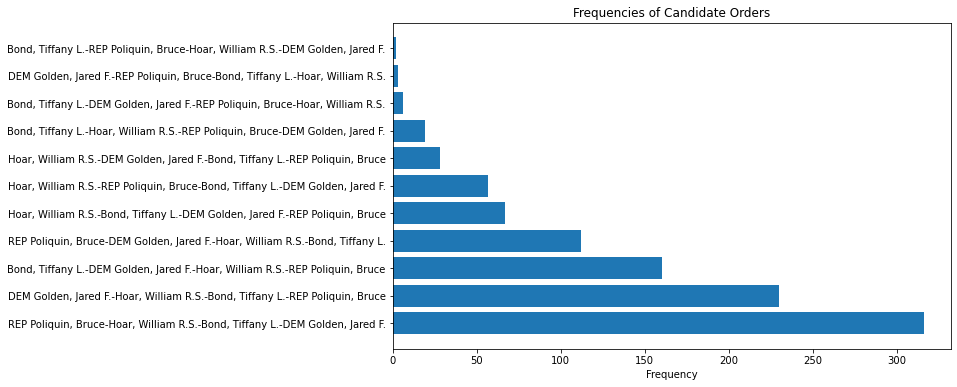

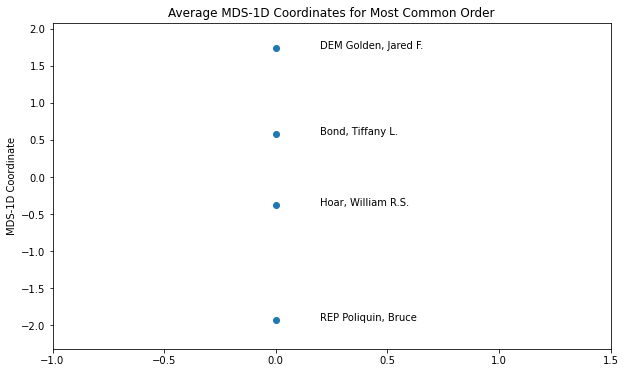

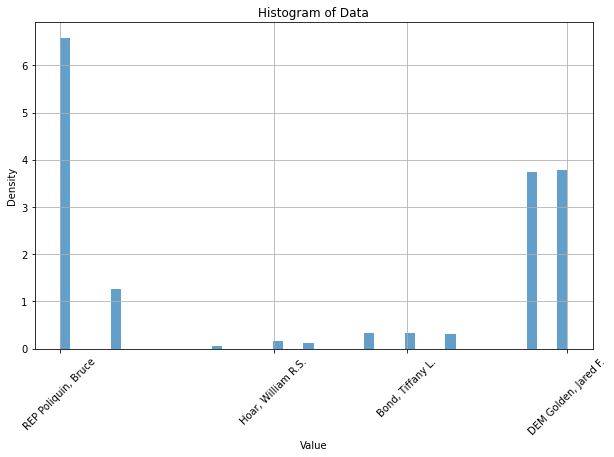

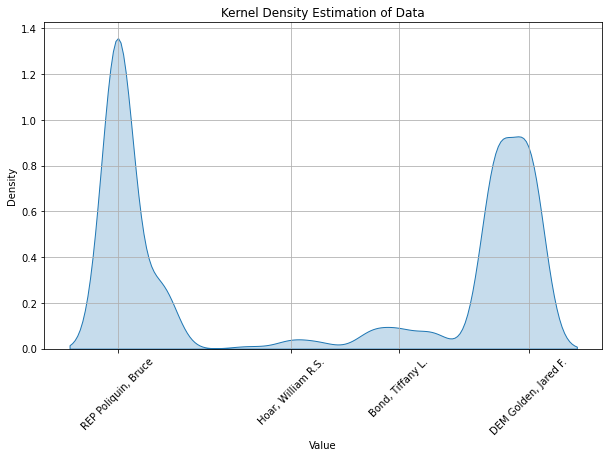

In [58]:
# Test the function with a custom CSV file
csv =  "dataverse_files/Maine_11062018_CongressionalDistrict2.csv"
ballots, candidates = parse_election_data(csv)

# Perform the RCV analysis
test = perform_rcv_analysis(csv, n_runs=1000)
mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names = test

# Print the normalized distances between candidates and plot the MDS analysis
normalized_distances = get_distances_normalized(most_common_order, mds_1d_coordinates, candidate_names)
print("Normalized distances:", normalized_distances)
plot_rcv_analysis(mds_1d_coordinates, mds_2d_coordinates, most_common_order, order_frequencies, candidate_names)

# Get the consistency points for the bimodality analysis
points = get_consistency_points(ballots, candidates, normalized_distances)

# Create a list of data points
data_points = []
for key, value in points.items():
    data_points.extend([key] * value)

# Convert to numpy array
data_points = np.array(data_points)

# Prepare data for histogram
data_list = [x for x, count in points.items() for _ in range(count)]

normalized_points = []
normalized_names = []
for name in normalized_distances:
    normalized_names.append(name)
    normalized_points.append(normalized_distances[name])

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(data_list, bins=50, density=True, alpha=0.7)
plt.title('Histogram of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Plot kernal density estimation
plt.figure(figsize=(10, 6))
sns.kdeplot(data_list, fill=True)
plt.title('Kernel Density Estimation of Data')
plt.xticks(normalized_points, normalized_names, rotation=45)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [5]:
print(ballots)

{('REP Poliquin, Bruce',): 89669, ('DEM Golden, Jared F.', 'Bond, Tiffany L.'): 10505, ('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.'): 3467, ('Hoar, William R.S.', 'REP Poliquin, Bruce', 'Bond, Tiffany L.', 'DEM Golden, Jared F.'): 306, (): 5928, ('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.', 'REP Poliquin, Bruce'): 23140, ('REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.', 'DEM Golden, Jared F.'): 11600, ('Hoar, William R.S.', 'Bond, Tiffany L.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.'): 579, ('DEM Golden, Jared F.',): 51673, ('Hoar, William R.S.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.'): 200, ('DEM Golden, Jared F.', 'Hoar, William R.S.', 'REP Poliquin, Bruce'): 605, ('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.'): 17464, ('Bond, Tiffany L.', 'DEM Golden, Jared F.', 'Hoar, William R.S.'): 948, ('REP Poliquin, Bruce', 'Hoar, William R.S.'): 2801, ('Bond, Tif

#### run this cell to see the bimodality and gamma indices

In [59]:
#ballots, candidates = parse_election_data(csv)

# Calculate skewness and kurtosis
g = skew(data_points)
k = kurtosis(data_points)

# Calculate bimodality coefficient
n = len(data_points)
bimodality = (g**2 + 1) / (k + 3 * (n-1)**2 / ((n-2) * (n-3)))
print("Bimodality coefficient:", bimodality)
print("Gamma coefficiet:", get_gamma(normalized_distances, ballots))



Bimodality coefficient: 0.9205401726662827
from gamma:  {('REP Poliquin, Bruce',): 89669, ('DEM Golden, Jared F.', 'Bond, Tiffany L.'): 10505, ('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.'): 3467, ('Hoar, William R.S.', 'REP Poliquin, Bruce', 'Bond, Tiffany L.', 'DEM Golden, Jared F.'): 306, (): 5928, ('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.', 'REP Poliquin, Bruce'): 23140, ('REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.', 'DEM Golden, Jared F.'): 11600, ('Hoar, William R.S.', 'Bond, Tiffany L.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.'): 579, ('DEM Golden, Jared F.',): 51673, ('Hoar, William R.S.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.'): 200, ('DEM Golden, Jared F.', 'Hoar, William R.S.', 'REP Poliquin, Bruce'): 605, ('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.'): 17464, ('Bond, Tiffany L.', 'DEM Golden, Jared F.', 'Hoar, William R.S.'): 948, ('REP Po

#### winner under different RCV methods 

In [6]:
df = pd.DataFrame(ballots.keys(), ballots.values())
print(df)
df.to_csv("ballots.csv")

                           0                      1                      2
54734  Golden, Jared Forrest                   None                   None
36058  Golden, Jared Forrest          Bond, Tiffany        Poliquin, Bruce
98263        Poliquin, Bruce                   None                   None
53643  Golden, Jared Forrest          Bond, Tiffany                   None
6541           Bond, Tiffany  Golden, Jared Forrest        Poliquin, Bruce
3140   Golden, Jared Forrest        Poliquin, Bruce                   None
8581         Poliquin, Bruce  Golden, Jared Forrest          Bond, Tiffany
20180        Poliquin, Bruce          Bond, Tiffany  Golden, Jared Forrest
11416        Poliquin, Bruce          Bond, Tiffany                   None
5821   Golden, Jared Forrest        Poliquin, Bruce          Bond, Tiffany
5734                    None                   None                   None
4989           Bond, Tiffany                   None                   None
5527           Bond, Tiff

In [60]:
#csv = "dataverse_files/Berkeley_11062018_CityCouncilDistrict4.csv"
ballots, candidates = parse_election_data(csv)
election = voting_rules(ballots, candidates)
print("IRV: ", election.irv())
print("Condorcet: ", election.condorcet())
print("Black: ", election.black())
print("Borda: ", election.borda())
print("Bucklin: ", election.bucklin())
print("Ranked Pairs: ", election.ranked_pairs())
print("Copeland: ", election.copeland())
print("mini_max: ", election.mini_max())
print("Plurality: ", election.plurality())
print("Majority: ", election.majority())
print("Approval: ", election.approval())

removed  Hoar, William R.S.  with  6996
removed  Bond, Tiffany L.  with  19313
removed  REP Poliquin, Bruce  with  139238
IRV:  DEM Golden, Jared F.
Condorcet:  DEM Golden, Jared F.
Black:  DEM Golden, Jared F.
Borda:  DEM Golden, Jared F.
Bucklin:  DEM Golden, Jared F.
Ranked Pairs:  DEM Golden, Jared F.
Copeland:  DEM Golden, Jared F.
mini_max:  DEM Golden, Jared F.
Plurality:  REP Poliquin, Bruce
Majority:  -1
Approval:  DEM Golden, Jared F.


In [61]:
consistent_ballots = {}
most_consistent_permutation = []
permutation_numbers = []
for candidate in normalized_distances:
    most_consistent_permutation.append(candidate)
    permutation_numbers.append(normalized_distances[candidate])

points = {}

equal = {}
for i in range(len(most_consistent_permutation)):
    equal[most_consistent_permutation[i]] = i

for ballot in ballots:
    equal_distances = []
    for candidate in ballot:
        equal_distances.append(equal[candidate])

    mds_distances = []
    for candidate in ballot:
        mds_distances.append(normalized_distances[candidate])

    #checking if the ballot is consistent with the mds permutation but assuming they are equaly distances 
    check_consistency = evaluate_ballot_consistency(equal_distances, len(candidates))
    if check_consistency[0] is True:
        consistent_ballots[ballot] = ballots[ballot]
print(len(ballots), " ", len(consistent_ballots))
for b in ballots:
    if b not in consistent_ballots:
        print(b, ": not consistent " ,ballots[b])
    else:
        print(b, ": consistent ", ballots[b])
print("just consistent ballots: ")
for b in consistent_ballots:
    print(b, ": ", consistent_ballots[b])

        


65   25
('REP Poliquin, Bruce',) : consistent  89669
('DEM Golden, Jared F.', 'Bond, Tiffany L.') : consistent  10505
('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.') : not consistent  3467
('Hoar, William R.S.', 'REP Poliquin, Bruce', 'Bond, Tiffany L.', 'DEM Golden, Jared F.') : consistent  306
() : consistent  5928
('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.', 'REP Poliquin, Bruce') : consistent  23140
('REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.', 'DEM Golden, Jared F.') : consistent  11600
('Hoar, William R.S.', 'Bond, Tiffany L.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.') : consistent  579
('DEM Golden, Jared F.',) : consistent  51673
('Hoar, William R.S.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.') : not consistent  200
('DEM Golden, Jared F.', 'Hoar, William R.S.', 'REP Poliquin, Bruce') : not consistent  605
('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R

In [62]:

election2 = voting_rules(consistent_ballots, candidates)
print("IRV: ", election2.irv())
print("Condorcet: ", election2.condorcet())
print("Black: ", election2.black())
print("Borda: ", election2.borda())
print("Bucklin: ", election2.bucklin())
print("Ranked Pairs: ", election2.ranked_pairs())
print("Copeland: ", election2.copeland())
print("mini_max: ", election2.mini_max())
print("Plurality: ", election2.plurality())
print("Majority: ", election2.majority())
print("Approval: ", election2.approval())

removed  Hoar, William R.S.  with  4421
removed  Bond, Tiffany L.  with  14730
removed  REP Poliquin, Bruce  with  108551
IRV:  DEM Golden, Jared F.
Condorcet:  DEM Golden, Jared F.
Black:  DEM Golden, Jared F.
Borda:  DEM Golden, Jared F.
Bucklin:  REP Poliquin, Bruce
Ranked Pairs:  DEM Golden, Jared F.
Copeland:  DEM Golden, Jared F.
mini_max:  Hoar, William R.S.
Plurality:  REP Poliquin, Bruce
Majority:  -1
Approval:  DEM Golden, Jared F.


In [67]:
import numpy as np

def ballot_names_to_nums(ballots, candidate_names, order_frequencies):
    """
    Convert ballot names to numerical representation based on candidate order.

    Parameters
    ----------
    ballots : dict
        A dictionary containing ballot names as keys and associated order information.

    candidate_names : list
        A list of candidate names in the order they are to be represented numerically.

    order_frequencies : list
        A list containing order frequencies information, typically obtained from voting data.

    Returns
    -------
    tuple
        A tuple containing two elements:
        - ballot_nums : numpy.ndarray
            A 2D array representing numerical order of candidates for each ballot.
        - candidate_names_order : numpy.ndarray
            An array of candidate names in the order they are numerically represented.

    Notes
    -----
    This function takes a dictionary of ballots, a list of candidate names, and order frequencies
    to convert the ballot names to numerical representation based on the given candidate order.

    The resulting `ballot_nums` array has dimensions (number of ballots, number of candidates),
    where each row represents a ballot with numerical order of candidates.

    The `candidate_names_order` array represents the numerical order of candidate names as obtained
    from the order frequencies.
    """

    candidate_names_order = np.array(candidate_names)[np.array(order_frequencies[0][0]).astype(int)]#[::-1]
    ballot_name_orders = list(ballots.keys())

    ballot_nums = np.inf*np.ones((len(ballot_name_orders), len(candidate_names)), dtype=int)
    order_transform = np.array(order_frequencies[0][0]).astype(int)

    for i in range(len(ballot_name_orders)):
        ballot_names = np.array(ballot_name_orders[i])
        for j in range(len(candidate_names)):
            ballot_names[ballot_names == candidate_names_order[j]] = j
        ballot_names = ballot_names.astype(int)
        ballot_num = np.inf*np.ones(len(candidate_names), dtype=int)
        ballot_num[0:len(ballot_names)] = ballot_names
        ballot_nums[i,:] = ballot_num

    return ballot_nums, candidate_names_order


def get_candidate_pair_intervals(ballot_nums, normalized_distances):
    """
    Calculate the intervals of possible points where the ballot could lie on the 1D axis
    treating each candidate pair separately in a given ballot ordering

    Parameters
    ----------
    ballot_nums : numpy.ndarray
        A 2D array representing the numerical order of candidates for each ballot.

    normalized_distances : dict
        A dictionary containing normalized distances between candidate coordinates.

    Returns
    -------
    tuple
        A tuple containing two elements:
        - intervals : numpy.ndarray
            A 3D array representing intervals between candidate pairs for each ballot order.
        - cand_coords : numpy.ndarray
            An array of candidate coordinates obtained from normalized distances.

    Notes
    -----
    The resulting `intervals` array has dimensions (2, number of ballot orders, number of pairs),
    where each slice along the first dimension represents the lower and upper bounds of the interval
    for a specific pair.

    The `cand_coords` array represents candidate coordinates obtained from the provided
    normalized distances.

    """
    n_pairs = ballot_nums.shape[1]-1
    n_ballot_orders = ballot_nums.shape[0]

    cand_coords = np.array(list(normalized_distances.values()))
    intervals = np.empty((2, n_ballot_orders, n_pairs))

    for i in range(n_pairs):
        ballot_nums_pairs = ballot_nums[:,i:i+2].astype(int)

        # if 2nd pair element is inf
        sing_inf_inds = np.where((ballot_nums_pairs[:, 0]>-100) & (ballot_nums_pairs[:, 1]<-100))[0]
        intervals[:, sing_inf_inds, i] = [cand_coords[ballot_nums_pairs[sing_inf_inds, 0]],
                                           cand_coords[ballot_nums_pairs[sing_inf_inds, 0]]]

        # if both pair elements are inf
        double_inf_inds = np.where((ballot_nums_pairs[:, 0]<-100) & (ballot_nums_pairs[:, 1]<-100))[0]
        intervals[:, double_inf_inds, i] = np.reshape(np.array([-np.inf, np.inf]),(2,1))

        # if neither pair elements are inf and first is larger
        double_coord_inds = np.where((ballot_nums_pairs[:, 0]>-100) &
                                     (ballot_nums_pairs[:, 1]>-100) &
                                     (ballot_nums_pairs[:, 0]>ballot_nums_pairs[:, 1]))[0]
        first_coord = cand_coords[ballot_nums_pairs[double_coord_inds, 0]]
        second_coord = cand_coords[ballot_nums_pairs[double_coord_inds, 1]]
        mean_coord = (first_coord + second_coord)/2.
        intervals[:, double_coord_inds, i] = np.vstack((mean_coord, max(cand_coords)*np.ones(len(mean_coord))))

        # if neither pair elements are inf and first is smaller
        double_coord_inds = np.where((ballot_nums_pairs[:, 0]>-100) &
                                     (ballot_nums_pairs[:, 1]>-100) &
                                      ballot_nums_pairs[:, 0]<ballot_nums_pairs[:, 1])[0]
        first_coord = cand_coords[ballot_nums_pairs[double_coord_inds, 0]]
        second_coord = cand_coords[ballot_nums_pairs[double_coord_inds, 1]]
        mean_coord = (first_coord + second_coord)/2.
        intervals[:, double_coord_inds, i] = np.vstack((np.zeros(len(mean_coord)), first_coord + mean_coord))

    return intervals, cand_coords

def get_ballot_coords(ballots, intervals, cand_coords, n_points=500):
    """
    Generate coordinates and weights for a smooth representation of ballot distributions.

    Parameters
    ----------
    ballots : dict
        A dictionary containing ballot names as keys and associated order information.

    intervals : numpy.ndarray
        A 3D array representing intervals between candidate pairs for each ballot order.

    cand_coords : numpy.ndarray
        An array of candidate coordinates obtained from normalized distances.

    n_points : int, optional
        The number of points to generate along the coordinate axis. Default is 500.

    Returns
    -------
    tuple
        A tuple containing two elements:
        - points_all : numpy.ndarray
            An array of coordinate points representing the smooth distribution.
        - weights_all : numpy.ndarray
            An array of weights corresponding to each coordinate point.

    Notes
    -----
    This function generates smooth representations of ballot distributions by considering
    intervals between candidate pairs for each ballot order. It uses a specified number of
    points along the coordinate axis to create a smooth distribution.

    The resulting `points_all` array contains coordinate points, and the `weights_all` array
    contains weights corresponding to each coordinate point. The weights are calculated based
    on the number of ballot orders and the density of points in the intervals.
    """

    axis = np.linspace(min(cand_coords), max(cand_coords), n_points)
    consistent_ballots = {}
    points_all = np.array([])
    weights_all = np.array([])
    for i in range(len(ballots)):
        
        intervals_seq = np.reshape(intervals[:,i,:].T, (len(cand_coords)-1,2))
        intersect = find_interval_intersection(intervals_seq)
        #if (intersect is None )

        if intersect is not None:
            if len(list(ballots.keys())[i]) == 0:
                print("not consistent: ", list(ballots.keys())[i])
            elif len(list(ballots.keys())[i]) > 2:
                print("not consistent: ", list(ballots.keys())[i])
            else:
                consistent_ballots[list(ballots.keys())[i]]  = ballots[list(ballots.keys())[i]]
                print("consistent: ", list(ballots.keys())[i])
            if min(intersect) != max(intersect):
                inds_ax_pts = np.where((axis >= min(intersect)) & (axis <= (max(intersect))))[0]
            else:
                inds_ax_pts =  np.argmin(np.abs(axis - min(intersect)))
            points = np.atleast_1d(axis[inds_ax_pts])
            num_ballot_order = list(ballots.values())[i]
            weights = num_ballot_order*np.ones(len(points))/len(points)
            points_all = np.concatenate((points_all, points))
            weights_all = np.concatenate((weights_all, weights))
        else:
           print("consistent: ", list(ballots.keys())[i])
           consistent_ballots[list(ballots.keys())[i]]  = ballots[list(ballots.keys())[i]]
   
        
    weights_all = weights_all/np.sum(weights_all)

    return points_all, weights_all, consistent_ballots


def find_interval_intersection(intervs):
    """
    Find the intersection of a list of intervals.

    Parameters
    ----------
    intervs : list of tuples
        A list of intervals represented as tuples (start, end).

    Returns
    -------
    tuple or None
        If there is an intersection, returns a tuple representing the intersection interval (start, end).
        If there is no intersection or the input list has less than two intervals, returns None.

    Notes
    -----
    This function takes a list of intervals and finds their intersection. The intervals are represented as
    tuples of start and end points.

    The input list `intervs` is sorted based on the start points of the intervals. The function iterates
    through the sorted intervals, updating the intersection interval accordingly.

    If there is no intersection or the input list has less than two intervals, the function returns None.
    """

    if len(intervs) < 2:
        return None  # Cannot find intersection with less than two intervals

    # Sort intervals based on their start points
    sorted_intervals = sorted(intervs, key=lambda x: x[0])

    # Initialize the intersection with the first interval
    intersection = sorted_intervals[0]

    # Iterate over the sorted intervals and update the intersection
    for interval in sorted_intervals[1:]:
        if intersection[1] >= interval[0]:
            # Update the start and end points of the intersection
            intersection = (max(intersection[0], interval[0]), min(intersection[1], interval[1]))
        else:
            return None  # No intersection

    return intersection

In [68]:
ballot_nums, candidate_names_order = ballot_names_to_nums(ballots, candidate_names, order_frequencies)

# Get the list of potential points for each adjacent candidate pair in the ballots
intervals, cand_coords = get_candidate_pair_intervals(ballot_nums, normalized_distances)

# get the coordinate points and weights that describe the ballot distribution
n_points = 500
points_all, weights_all, consistent_ballots = get_ballot_coords(ballots, intervals, cand_coords, n_points=n_points)

consistent:  ('REP Poliquin, Bruce',)
consistent:  ('DEM Golden, Jared F.', 'Bond, Tiffany L.')
not consistent:  ('REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.')
not consistent:  ('Hoar, William R.S.', 'REP Poliquin, Bruce', 'Bond, Tiffany L.', 'DEM Golden, Jared F.')
not consistent:  ()
not consistent:  ('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.', 'REP Poliquin, Bruce')
not consistent:  ('REP Poliquin, Bruce', 'Hoar, William R.S.', 'Bond, Tiffany L.', 'DEM Golden, Jared F.')
not consistent:  ('Hoar, William R.S.', 'Bond, Tiffany L.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.')
consistent:  ('DEM Golden, Jared F.',)
not consistent:  ('Hoar, William R.S.', 'REP Poliquin, Bruce', 'DEM Golden, Jared F.', 'Bond, Tiffany L.')
consistent:  ('DEM Golden, Jared F.', 'Hoar, William R.S.', 'REP Poliquin, Bruce')
not consistent:  ('DEM Golden, Jared F.', 'Bond, Tiffany L.', 'Hoar, William R.S.')
consistent:  ('Bond, Tiffany L.', 'D

C:\Users\mahsh\AppData\Local\Temp\ipykernel_25492\399762189.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ballot_names[ballot_names == candidate_names_order[j]] = j


In [65]:
total = 0
consistent = 0

for b in ballots:
    if (len(b) > 0):
        total += ballots[b]
    if b in consistent_ballots:
        consistent += ballots[b]
print(consistent/total)
print(total)
print(consistent)

0.7129612716225112
290149
206865


In [66]:
election3 = voting_rules(consistent_ballots, candidates)
print("IRV: ", election3.irv())
print("Condorcet: ", election3.condorcet())
print("Black: ", election3.black())
print("Borda: ", election3.borda())
print("Bucklin: ", election3.bucklin())
print("Ranked Pairs: ", election3.ranked_pairs())
print("Copeland: ", election3.copeland())
print("mini_max: ", election3.mini_max())
print("Plurality: ", election3.plurality())
print("Majority: ", election3.majority())
print("Approval: ", election3.approval())

IRV:  REP Poliquin, Bruce
Condorcet:  REP Poliquin, Bruce
Black:  REP Poliquin, Bruce
Borda:  DEM Golden, Jared F.
Bucklin:  REP Poliquin, Bruce
Ranked Pairs:  REP Poliquin, Bruce
Copeland:  DEM Golden, Jared F.
mini_max:  REP Poliquin, Bruce
Plurality:  REP Poliquin, Bruce
Majority:  REP Poliquin, Bruce
Approval:  REP Poliquin, Bruce


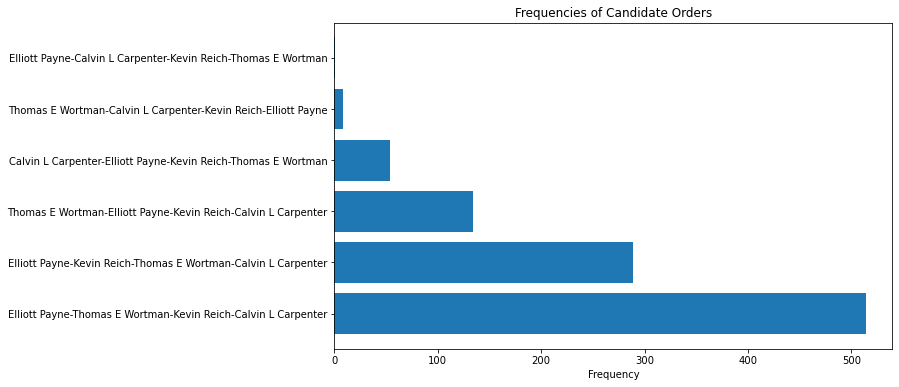

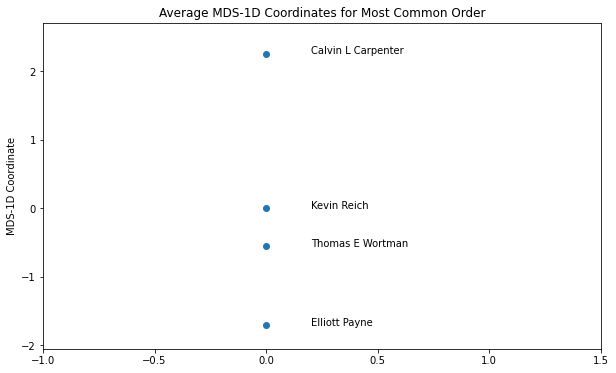

In [9]:
plot_rcv_analysis(mds_1d_coordinates, 
                         mds_2d_coordinates, 
                         most_common_order, 
                         order_frequencies, 
                         candidate_names)

In [25]:
ballot_nums, candidate_names_order = ballot_names_to_nums(ballots, candidates, order_frequencies)
intervs = get_candidate_pair_intervals(ballot_nums, normalized_distances)
print(intervs[0])
print(intervs[1])

[[[0.48738414 0.        ]
  [0.         2.        ]
  [0.         0.48738414]
  [0.         0.        ]
  [0.               -inf]
  [0.         0.        ]
  [0.         0.97476827]
  [0.         1.        ]
  [0.         0.97476827]
  [0.97476827       -inf]
  [2.               -inf]
  [0.48738414 0.        ]
  [0.         2.        ]
  [      -inf       -inf]
  [1.         0.        ]
  [1.         0.        ]]

 [[2.         1.        ]
  [2.46215241 2.        ]
  [3.48738414 2.        ]
  [1.         3.48738414]
  [0.                inf]
  [0.48738414 2.46215241]
  [0.48738414 0.97476827]
  [2.46215241 2.        ]
  [3.48738414 0.97476827]
  [0.97476827        inf]
  [2.                inf]
  [2.         0.        ]
  [1.         2.        ]
  [       inf        inf]
  [2.         0.48738414]
  [2.         0.        ]]]
[0.         0.97476827 2.        ]


C:\Users\mahsh\AppData\Local\Temp\ipykernel_22084\799038723.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ballot_names[ballot_names == candidate_names_order[j]] = j


In [26]:
print(find_interval_intersection(intervs))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [72]:
def calculate_intervals(numbers):
    midpoints = []
    for i in range(len(numbers)):
        for j in range(i + 1, len(numbers)):
            midpoints.append((numbers[i] + numbers[j])/2)

    intervals = []
    midpoints = sorted(midpoints)
    for i in range(len(midpoints)):
        for j in range(i + 1, len(midpoints)):
            intervals.append((midpoints[i], midpoints[j]))
    return midpoints, intervals

def check_ordering(numbers, ordering):
    for i in range(len(ordering) - 1):
        if ordering[i] > ordering[i+1]:
            ordering[i], ordering[i+1] = ordering[i+1], ordering[i]
    
    for i in range(len(numbers) - 1):
        if ordering[0] > numbers[i] or ordering[-1] < numbers[i+1]:
            continue
        if (ordering[0] <= numbers[i] and numbers[i+1] <= ordering[-1]) or (ordering[0] >= numbers[i] and numbers[i+1] >= ordering[-1]):
            return True
    return False

def main():
    numbers = [0, 1.2, 2.05, 3]
    midpoints, intervals = calculate_intervals(numbers)
    print("Midpoints:", midpoints)
    print("Intervals:", intervals)

    ordering = [1.2, 0, 2.05, 3]
    print("Ordering:", ordering)
    print("Result:", check_ordering(numbers, ordering))

    ordering = [3, 1.2, 2.05]
    print("Ordering:", ordering)
    print("Result:", check_ordering(numbers, ordering))

if __name__ == "__main__":
    main()


Midpoints: [0.6, 1.025, 1.5, 1.625, 2.1, 2.525]
Intervals: [(0.6, 1.025), (0.6, 1.5), (0.6, 1.625), (0.6, 2.1), (0.6, 2.525), (1.025, 1.5), (1.025, 1.625), (1.025, 2.1), (1.025, 2.525), (1.5, 1.625), (1.5, 2.1), (1.5, 2.525), (1.625, 2.1), (1.625, 2.525), (2.1, 2.525)]
Ordering: [1.2, 0, 2.05, 3]
Result: True
Ordering: [3, 1.2, 2.05]
Result: True


In [73]:
from scipy.optimize import linprog

In [81]:
e = 0.00001
obj=[1]
lhs_ineq = [[-1], [1], [1], [1], [1], [1]]
rhs_ineq = [-(0.6+e), (e+1.625), (e+2.1), (e+1.025), (e+1.5), (e+2.525)]
bnd = [0,3]

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd,
              method="revised simplex")
print(opt)

     con: array([], dtype=float64)
     fun: 0.6000099999999999
 message: 'The solution was determined in presolve as there are no non-trivial constraints.'
     nit: 0
   slack: array([0.   , 1.025, 1.5  , 0.425, 0.9  , 1.925])
  status: 0
 success: True
       x: array([0.60001])
